生成数据

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(2020)
x = np.random.rand(500, 6)
y = x.dot(np.array([4.2,5.7,10.8,1.2,2.6,3.1]))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 数据标准化
ss = StandardScaler()
x_train_s = ss.fit_transform(x_train)
x_test_s = ss.transform(x_test)

(490, 6) (490,) (10, 6) (10,)


In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

## 1. 调用sklearn的线性回归模型

估计的参数1： [ 4.2  5.7 10.8  1.2  2.6  3.1]
估计的参数2： [1.20084982 1.74281804 3.08446311 0.35613659 0.75021615 0.90691017]
真实值： [17.23901223 13.19340757 19.2926659   9.04714334  9.02264982 22.83728592
 15.33071469  4.56751197 19.77929857 14.05562615]
预测值： [17.23901223 13.19340757 19.2926659   9.04714334  9.02264982 22.83728592
 15.33071469  4.56751197 19.77929857 14.05562615]
预测值： [17.23901223 13.19340757 19.2926659   9.04714334  9.02264982 22.83728592
 15.33071469  4.56751197 19.77929857 14.05562615]


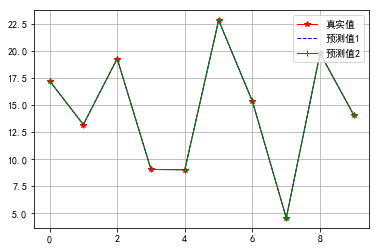

In [90]:
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression(fit_intercept=True)
lr2 = LinearRegression(fit_intercept=True)
lr1.fit(x_train, y_train)
lr2.fit(x_train_s, y_train)

y_predict1 = lr1.predict(x_test)
y_predict2 = lr2.predict(x_test_s)

print('估计的参数1：', lr1.coef_)
print('估计的参数2：', lr2.coef_)
print('真实值：', y_test)
print('预测值：', y_predict1)
print('预测值：', y_predict2)

## 预测值和实际值画图比较
t = np.arange(len(x_test))
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r*-', linewidth=1, label='真实值')
plt.plot(t, y_predict1, 'b--', linewidth=1, label='预测值1')
plt.plot(t, y_predict2, 'g+-', linewidth=1, label='预测值2')
plt.legend(loc='upper right')
plt.grid(b=True)
plt.show()


## 2. 最小二乘法的矩阵求解

估计的参数1： [ 4.2  5.7 10.8  1.2  2.6  3.1]
估计的参数2： [1.20084982 1.74281804 3.08446311 0.35613659 0.75021615 0.90691017]
真实值：[17.23901223 13.19340757 19.2926659   9.04714334  9.02264982 22.83728592
 15.33071469  4.56751197 19.77929857 14.05562615]
预测值1：[17.23901223 13.19340757 19.2926659   9.04714334  9.02264982 22.83728592
 15.33071469  4.56751197 19.77929857 14.05562615]
预测值2：[ 3.70226513 -0.34333953  5.75591881 -4.48960375 -4.51409727  9.30053883
  1.7939676  -8.96923512  6.24255148  0.51887906]


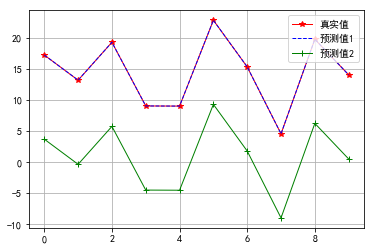

In [91]:
class LR_GD():
    def __init__(self):
        self.W = None
    
    def fit(self, X, y):
        self.W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        return X.dot(self.W)

lr_gd1 = LR_GD()
lr_gd2 = LR_GD()
lr_gd1.fit(x_train, y_train)
lr_gd2.fit(x_train_s, y_train)
y_predict1 = lr_gd1.predict(x_test)
y_predict2 = lr_gd2.predict(x_test_s)
print('估计的参数1：', lr_gd1.W)
print('估计的参数2：', lr_gd2.W)
print('真实值：%s' % (y_test))
print('预测值1：%s' % (y_predict1))
print('预测值2：%s' % (y_predict2))

t = np.arange(len(x_test))
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r*-', linewidth=1, label='真实值')
plt.plot(t, y_predict1, 'b--', linewidth=1, label='预测值1')
plt.plot(t, y_predict2, 'g+-', linewidth=1, label='预测值2')
plt.legend(loc='upper right')
plt.grid(b=True)
plt.show()

## 3. 梯度下降法

估计的参数1： [[ 4.20000114]
 [ 5.70000005]
 [10.79999893]
 [ 1.20000015]
 [ 2.59999954]
 [ 3.10000015]]
真实值：[17.23901223 13.19340757 19.2926659   9.04714334  9.02264982 22.83728592
 15.33071469  4.56751197 19.77929857 14.05562615]
预测值1：[[17.23901174]
 [13.19340715]
 [19.29266617]
 [ 9.04714358]
 [ 9.02265016]
 [22.83728623]
 [15.33071417]
 [ 4.56751192]
 [19.77929846]
 [14.05562505]]


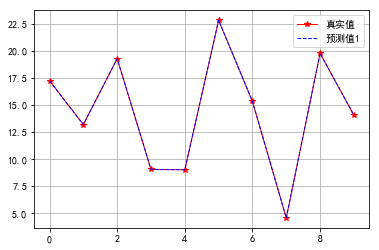

In [42]:
class LR_GD():
    def __init__(self):
        self.W = None
    
    def fit(self, X, y, lr=0.2, th=1e-10):
        y = y.reshape(-1, 1)
        [m, d] = np.shape(X)
        self.W = np.zeros((d,1))
        # self.W = (np.random.rand(d,1)-0.5) / 10
        loss = 1e5
        while loss > th:
            y_pred = X.dot(self.W)
            delta_W = lr * X.T.dot(y - y_pred) / X.shape[0]
            self.W = self.W + delta_W
            loss = np.sum((y - y_pred)**2)

    def predict(self, X):
        return X.dot(self.W)


lr_gd1 = LR_GD()
lr_gd2 = LR_GD()
lr_gd1.fit(x_train, y_train)
# lr_gd2.fit(x_train_s, y_train)
y_predict1 = lr_gd1.predict(x_test)
# y_predict2 = lr_gd2.predict(x_test_s)
print('估计的参数1：', lr_gd1.W)
# print('估计的参数2：', lr_gd2.W)
print('真实值：%s' % (y_test))
print('预测值1：%s' % (y_predict1))
# print('预测值2：%s' % (y_predict2))

t = np.arange(len(x_test))
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r*-', linewidth=1, label='真实值')
plt.plot(t, y_predict1, 'b--', linewidth=1, label='预测值1')
# plt.plot(t, y_predict2, 'g+-', linewidth=1, label='预测值2')
plt.legend(loc='upper right')
plt.grid(b=True)
plt.show()

# 疑问

1. 数据标准化后，最小二乘法得到的结果比正确结果差一个常数
2. 数据标准化后，梯度下降法不收敛